In [ ]:
#Linear regression analysis for Housing Sales in King County,USA
#The main aim of this task is to validate the assumptions of linear regression and prepare a full blown tutotrial for linear regression coding

#Following are the main assumptions of linear regression:
#1. There should be a linear relationship between response and target variable
#2.No multicollinearity between independent variables. Multicollinearity occurs when independent variables are too highly corrletaed with each other
#3.Residual errors should be normally distributed.
#4.Residual errors should be homoscedastic i.e. errors shud have a constant variance.

In [10]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import matplotlib.style as style
from scipy import stats
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
import scipy
import matplotlib.gridspec as gridspec
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('linearregg/kc_house_data.csv')
print(data.shape)

(21613, 21)


In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#Details of each feature:
#Let us go through what each feature is:

#ID - Unique ID for each home sold
#date- Date of the home sale
#price - Price of each home sold
#bedrooms - Number of bedrooms
#bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
#sqft_living - Square footage of the apartments interior living space
#sqft_lot - Square footage of the land space
#floors - Number of floors
#waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
#view - An index from 0 to 4 of how good the view of the property was
#condition - An index from 1 to 5 on the condition of the apartment,
#average level of construction and design, and 11-13 have a high quality level of construction and design.
#sqft_above - The square footage of the interior housing space that is above ground level
#sqft_basement - The square footage of the interior housing space that is below ground level
#yr_built - The year the house was initially built
#yr_renovated - The year of the house’s last renovation
#zipcode - What zipcode area the house is in
#lat - Lattitude
#long - Longitude
#sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
#sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [6]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
#Exploratory data analysis:
#1.Checking for null values:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#No missing values in the data

In [15]:
#Analyzing the target variable: Price
#function for ploting Histogram,Q-Q plot and 
# Box plot of target and also print skewness

def target_analysis(target):
    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(target,norm_hist=True,ax=ax1)
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Q-Q Plot')
    stats.probplot(target,plot=ax2)
    ax3 = fig.add_subplot(grid[:,2])
    ax3.set_title('Box Plot')
    sns.boxplot(target,orient='v',ax=ax3)
    print(f'skweness is { target.skew()}')
    plt.show()


skweness is 4.024069144684712


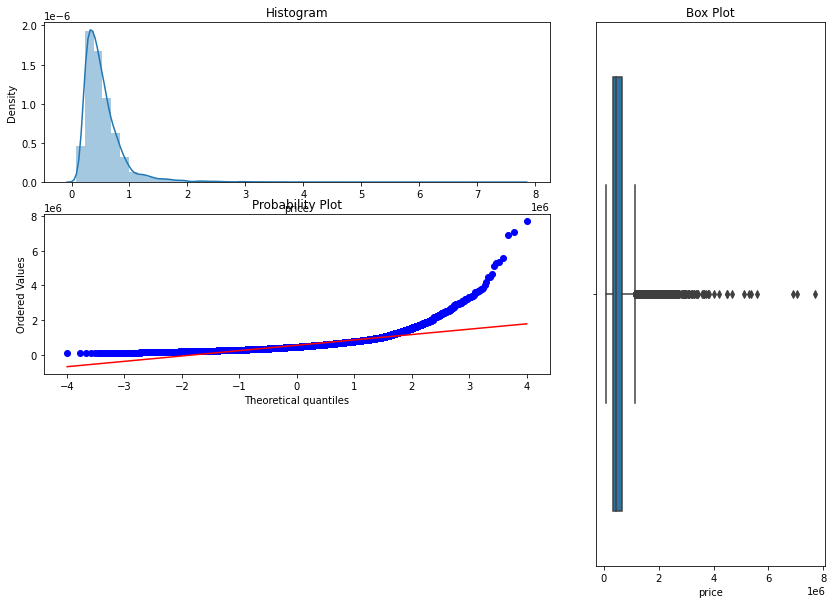

In [16]:
target_analysis(data['price'])

In [ ]:
#As can be seen from the plots above data is right skewed and skewness in more than 4. Letsa take the log transformation of the data

skweness is 0.4280765149574905


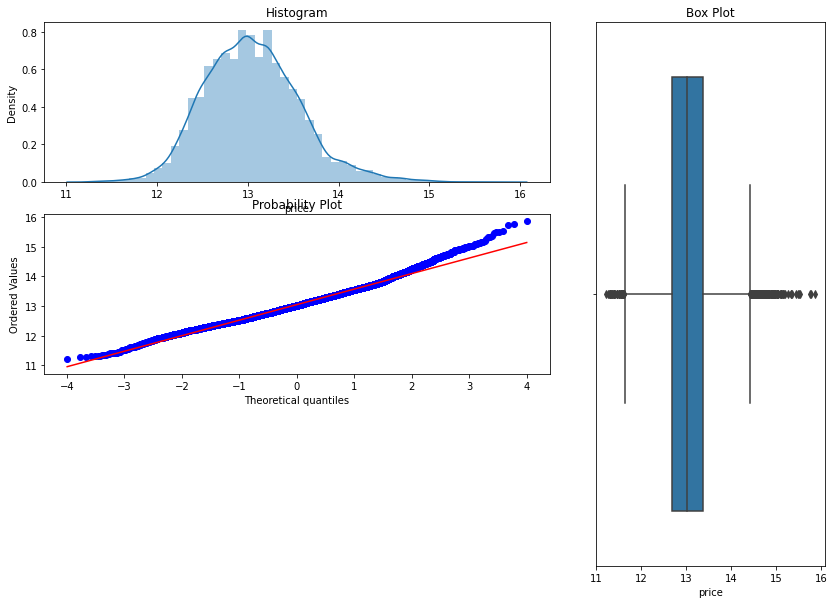

In [17]:
target_analysis(np.log1p(data['price']))

In [ ]:
by taking the log, we are able  to reduce the skewness of the target variable.

In [18]:
# transforming logprice
data['log_price'] = np.log1p(data['price'])

In [19]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

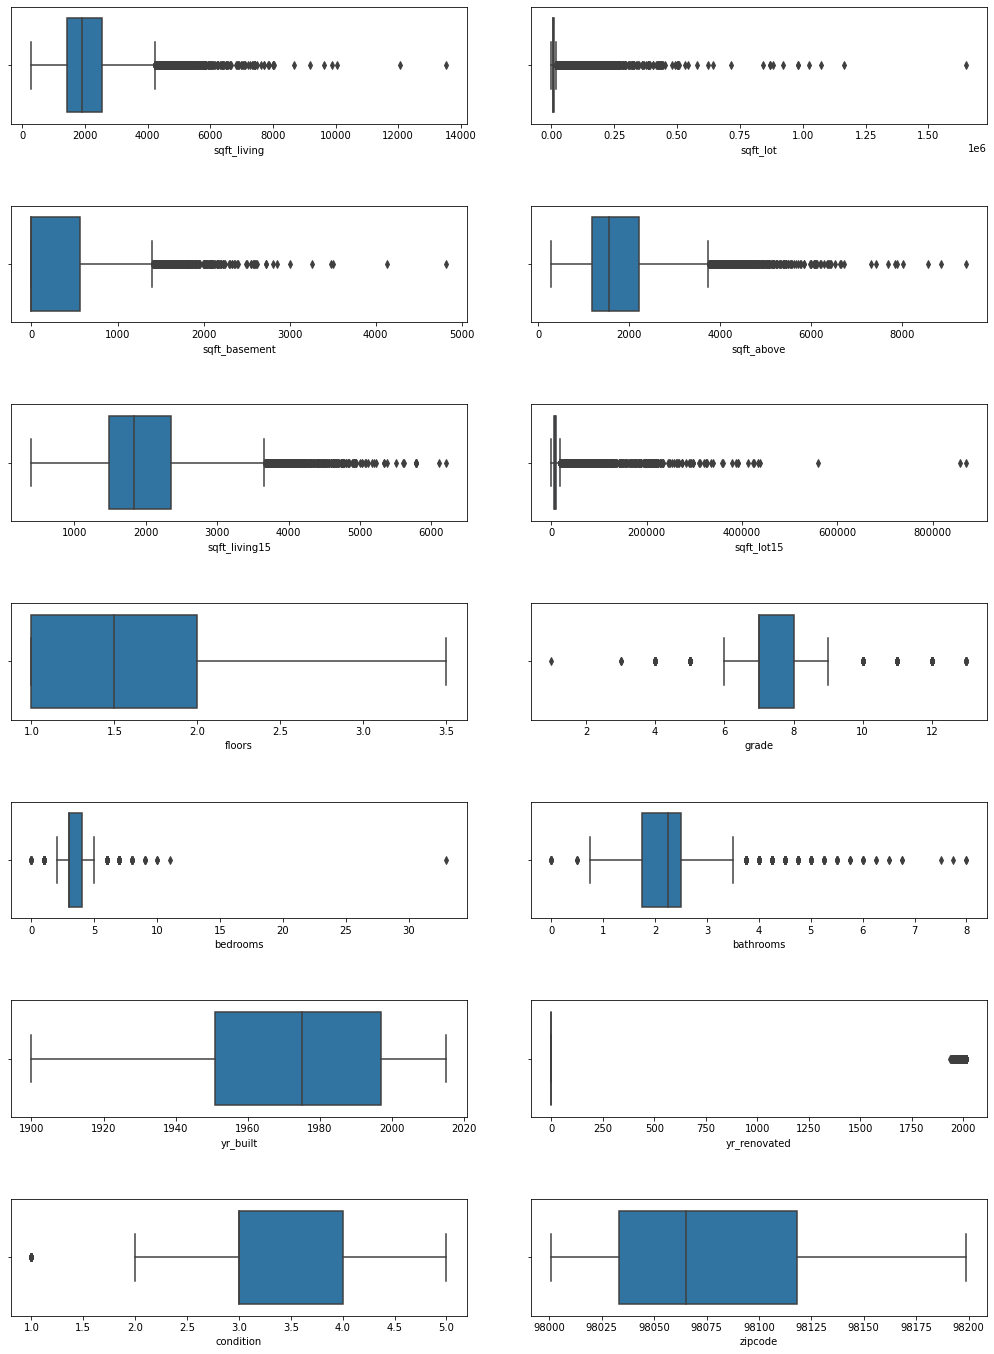

In [20]:
#checking the distributions of independent variables:
df_num = data[['sqft_living','sqft_lot','sqft_basement','sqft_above','sqft_living15','sqft_lot15','floors','grade',
             'bedrooms','bathrooms','yr_built','yr_renovated', 'condition','log_price','zipcode']]

multicoll_pairs = df_num.drop(columns=['log_price']).columns.to_list()

fig,axes = plt.subplots(7,2,figsize=(15,20))

def plot_two(feat,i,j):
    sns.boxplot(x=df_num[feat],ax=axes[i,j])
    fig.tight_layout(pad=5.0)

    

for i,feat in enumerate(multicoll_pairs):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)

In [ ]:
#We can see outliers in a lot of independent features. We will explore them going forward.

In [ ]:
#checking linearity (Assumption1)

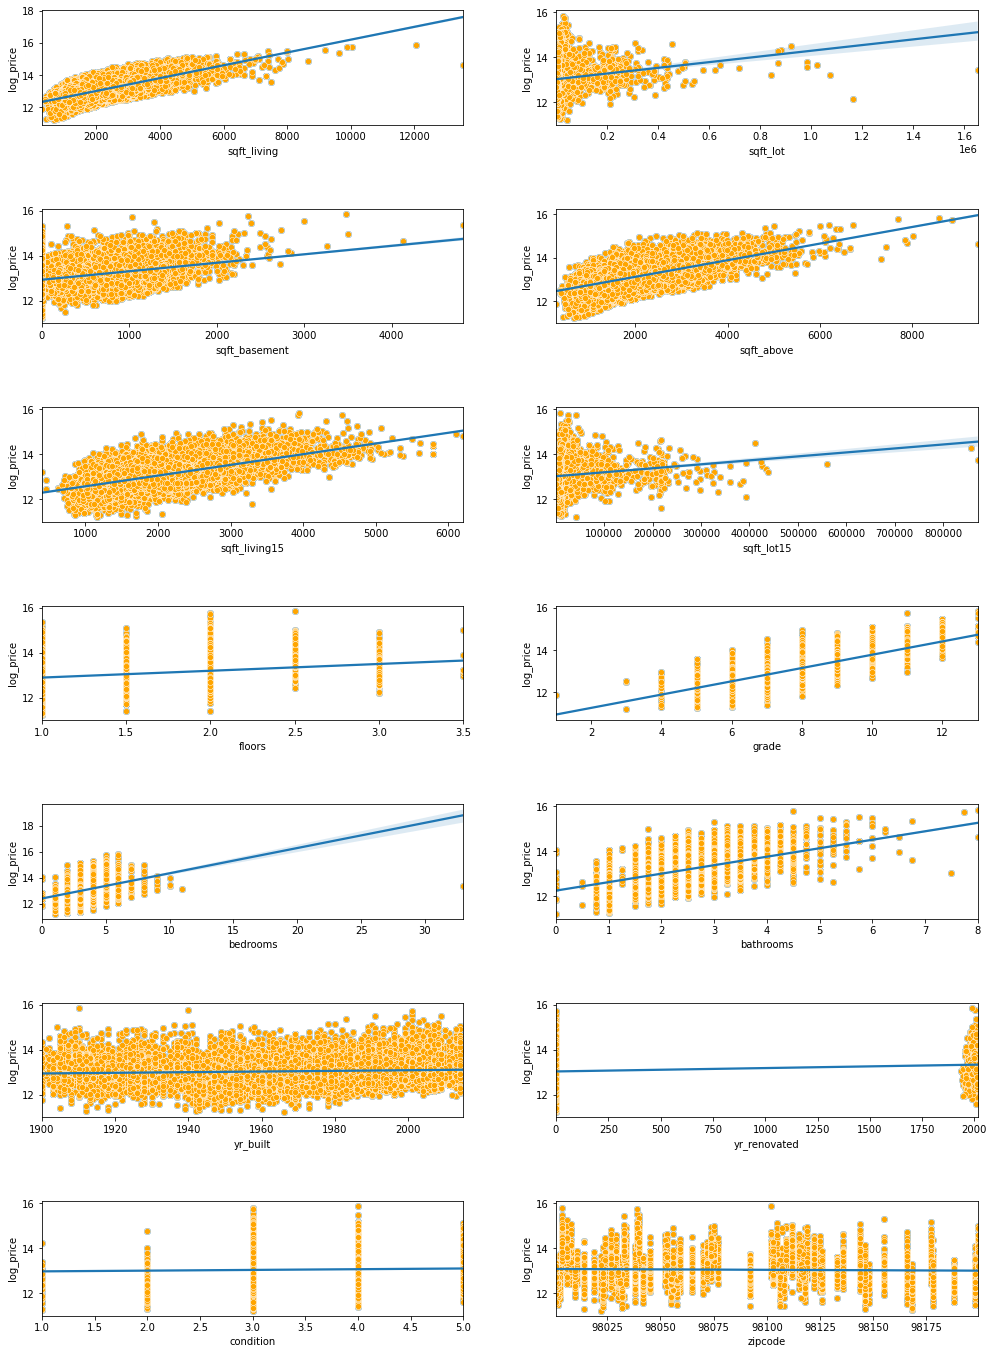

In [21]:
fig,axes = plt.subplots(7,2,figsize=(15,20))

def plot_two(feat,i,j):
    sns.regplot(x=df_num[feat], y=df_num['log_price'], ax=axes[i,j])
    sns.scatterplot(y=df_num['log_price'],x=df_num[feat],color=('orange'),ax=axes[i,j])   
    fig.tight_layout(pad=5.0)
    

for i,feat in enumerate(multicoll_pairs):
    j = i%2 #0 or 1
    plot_two(feat,i//2,j)

In [ ]:
We can see that sqft_living, sqft_basement, sqft_above, sqft_living15, shows good linearity.

We can see that sqft_lot and sqft_lot15 is not that much linear. We can feature transform them or drop them.

Number of bathrooms and bedrooms,floors, grades are also showing some linearity. So I think we do not need to convert them to categorical.

yr_built and yr_renovated doesnot show any sort of linearity.We will further feature engineer them.

Features like view, condition,zipcode behave categorical. So we will one hot encode them and use them as categorical features.

From boxplot it is clear that there is an outlier in bedrooms and we will remove it after analyzing if needed.

It is important to note that here by linearity we donot assume that our features must be perfectly linear. Almost linear is suffiecient for us to proceed further.

In [22]:
data = data.drop(columns=['sqft_lot15','sqft_lot'])

In [23]:
#analyzing bedroom data
data['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [24]:
data[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,log_price
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,13.369225


In [25]:
data = data[data['bedrooms'] != 33]

In [ ]:
#analyzing year of sale and age of building


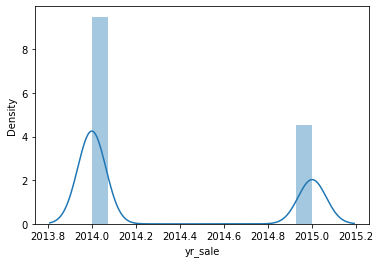

count    21612.000000
mean      2014.322969
std          0.467622
min       2014.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: yr_sale, dtype: float64

In [26]:
data['yr_sale'] = data['date'].apply(lambda x: int(str(x)[0:4]))

sns.distplot(data['yr_sale'])
plt.show()
data['yr_sale'].describe()

In [ ]:
We can see that all sales occured in year 2014 and 2015. We can also create a new feature Age of house at the time of sale from this.

In [27]:
data['age'] = -(data['yr_built'] - data['yr_sale'])

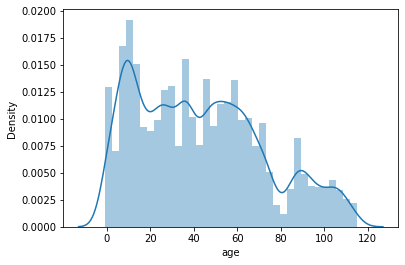

count    21612.000000
mean        43.316722
std         29.375731
min         -1.000000
25%         18.000000
50%         40.000000
75%         63.000000
max        115.000000
Name: age, dtype: float64

In [28]:
sns.distplot(data['age'])
plt.show()
data['age'].describe()


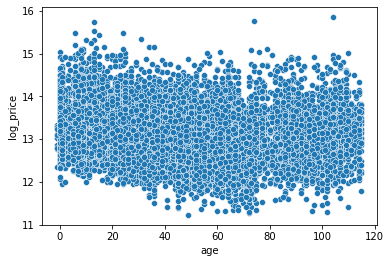

In [29]:
sns.scatterplot(data['age'],data['log_price'])
plt.show()

In [ ]:
#there seems to be no relationship between price and age ,hence we convert age to categorical variables


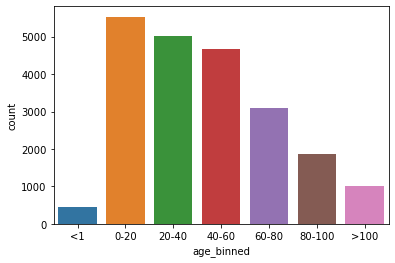

In [30]:
bins = [-30,0,20,40,60,80,100,120]
labels = ['<1','0-20','20-40','40-60','60-80','80-100','>100']
data['age_binned'] = pd.cut(data['age'], bins=bins, labels=labels)

sns.countplot(data['age_binned'])
plt.show()

In [ ]:
Analyzing year_built and year_renovated

count    21612.000000
mean      1971.006247
std         29.373636
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

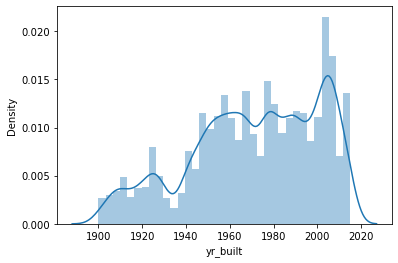

In [31]:
sns.distplot(data['yr_built'])
data['yr_built'].describe()

In [ ]:
All our year_bult data ranges betwwen 1900 to 2015. So we will custom encode it by dividing it to span of 10 years. for eg: if year_built between 1900-1910 -> 1, 1910-1920 -> 2 and likewise.

In [32]:
yr = [i for i in range(1900,2020)]
vals = [i for i in range(1,13) for j in range(10)]


dict_yr = { k:v for k,v in zip(yr,vals)}
data['yr_built_cat'] = data['yr_built'].map(dict_yr)
    

In [34]:
data['is_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else 0) #Categorical column for house renovation

In [ ]:
##Checking for second assumption of multicollinearity: Using pearson's correlation

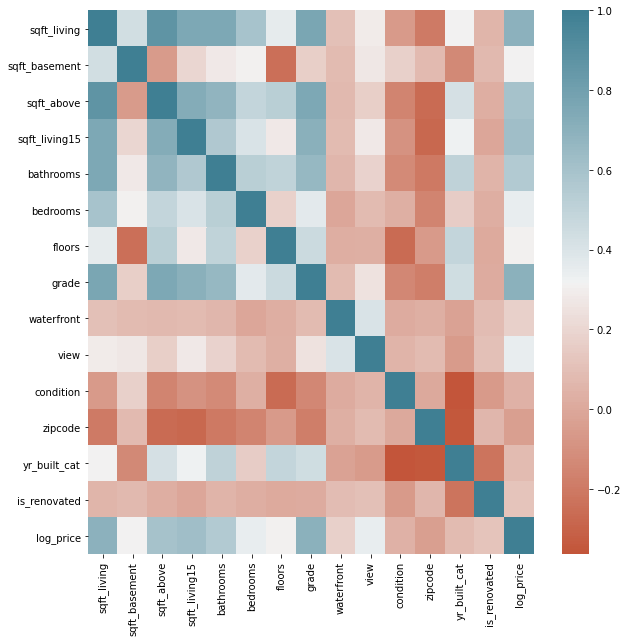

In [35]:
df = data[['sqft_living','sqft_basement','sqft_above','sqft_living15','bathrooms','bedrooms','floors','grade',
    'waterfront','view','condition','zipcode','yr_built_cat','is_renovated','age_binned','log_price']]
corr = df.corr()
# 'sqft_lot15','sqft_lot',
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [ ]:
#There exist a somewhat strong positive coorelation between sqft_living and sqft_above. Let us see how strong it is.

In [36]:
df[['sqft_living','sqft_above','log_price']].corr()

,sqft_living,sqft_above,log_price
sqft_living,1.000000,0.876597,0.695365
sqft_above,0.876597,1.000000,0.601844
log_price,0.695365,0.601844,1.000000


In [38]:
#Both of them maintains strong positive coorelation with each other. So its better we drop one feature. We will drop sqft_above (As it has lesser coorelation with target compared to sqft_living.)

In [39]:
df = df.drop(columns=['sqft_above'])

In [ ]:
#train test split to furhter validate the assumptions

In [42]:
num_cols = ['sqft_living','sqft_basement','sqft_living15','bathrooms','bedrooms','floors','grade']
# 'sqft_lot15','sqft_lot'

X = df.drop(columns=['log_price'])
y = df['log_price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15128, 14)
(6484, 14)
(15128,)
(6484,)


In [43]:
X_train.head()

,sqft_living,sqft_basement,sqft_living15,bathrooms,bedrooms,floors,grade,waterfront,view,condition,zipcode,yr_built_cat,is_renovated,age_binned
0,2680,0,2920,2.50,4,2.0,9,0,0,3,98006,10,0,0-20
1,2340,1170,1270,1.75,4,1.0,7,0,0,5,98115,3,0,80-100
2,2190,0,2170,2.25,4,2.0,8,0,0,3,98032,8,0,20-40
3,2260,370,2860,1.75,2,2.0,9,0,2,3,98014,11,0,0-20
4,2110,0,2110,1.75,4,1.0,8,0,0,4,98053,8,0,20-40


In [ ]:
#Now we will one hot encode categorical features.

In [44]:
feats = ['waterfront','view','condition','yr_built_cat','is_renovated','age_binned','zipcode']
one_hot_tr = pd.get_dummies(X_train[feats])
one_hot_test = pd.get_dummies(X_test[feats])
cat_train,cat_test = one_hot_tr.align(one_hot_test,join='left',axis=1)

In [45]:
cat_train.head()

,waterfront,view,condition,yr_built_cat,is_renovated,zipcode,age_binned_<1,age_binned_0-20,age_binned_20-40,age_binned_40-60,age_binned_60-80,age_binned_80-100,age_binned_>100
0,0,0,3,10,0,98006,0,1,0,0,0,0,0
1,0,0,5,3,0,98115,0,0,0,0,0,1,0
2,0,0,3,8,0,98032,0,0,1,0,0,0,0
3,0,2,3,11,0,98014,0,1,0,0,0,0,0
4,0,0,4,8,0,98053,0,0,1,0,0,0,0


In [ ]:
#Normalization
#It is important that we must standardize the data before fitting to regression models

In [46]:
std = StandardScaler()
std.fit(X_train[num_cols])
X_train[num_cols] = std.transform(X_train[num_cols])
X_test[num_cols] = std.transform(X_test[num_cols])

In [47]:
X_train = pd.concat((X_train[num_cols],cat_train),axis=1)
X_test = pd.concat((X_test[num_cols],cat_test),axis=1)

In [48]:
X_train.columns

Index(['sqft_living', 'sqft_basement', 'sqft_living15', 'bathrooms',
       'bedrooms', 'floors', 'grade', 'waterfront', 'view', 'condition',
       'yr_built_cat', 'is_renovated', 'zipcode', 'age_binned_<1',
       'age_binned_0-20', 'age_binned_20-40', 'age_binned_40-60',
       'age_binned_60-80', 'age_binned_80-100', 'age_binned_>100'],
      dtype='object')

In [ ]:
##Model-Linear regression

In [49]:
reg = LinearRegression()
reg.fit(X_train,y_train)

train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

In [50]:
print(f'Train mse: {np.sqrt(mean_squared_error(y_train,train_pred))}')
print(f'Test mse: {np.sqrt(mean_squared_error(y_test,test_pred))}')
print('-'*50)
print(f'Train R2: {r2_score(y_train,train_pred)}')
print(f'Test R2: {r2_score(y_test,test_pred)}')

Train mse: 0.30316289607946884
Test mse: 0.31073461025674337
--------------------------------------------------
Train R2: 0.6665115670309743
Test R2: 0.6570857391738485


In [ ]:
#Once the model has been built,lets check the assumption 3: Residual errrors should be normally distributed
#What’s normally is telling us is that most of the prediction errors from your model are zero or close to zero and large errors are much less frequent than the small errors. Q-Q plot is a effective way to check normality

skweness is -0.08668580924840391


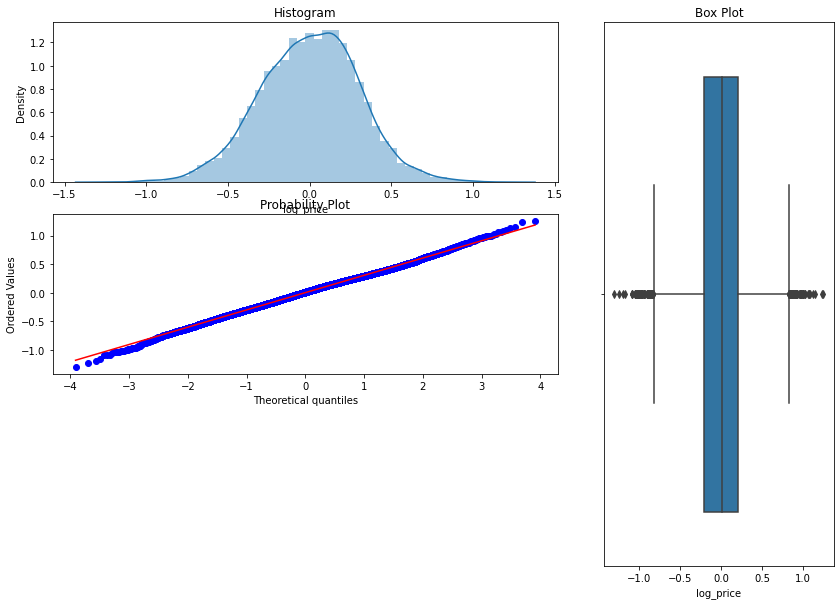

In [51]:
residuals = y_train - train_pred
target_analysis(residuals)

In [ ]:
#We got an approximate normal distribution as is evidnent from Q-Q plot

In [ ]:
#Now lets check for assumption 4: Homoscedasticity
#Homoscedacity means equal variance distribution and hetrosceadacity means unequal variance distribution. We will check the nature between residuals and fitted value to check for heteroscedacity. Usually if it is heteroscedacitic, we will get a funnel shaped plot

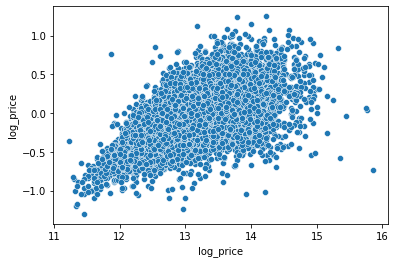

In [52]:
residuals = y_train - train_pred

sns.scatterplot(y_train,residuals)
plt.show()

In [ ]:
#It is evident that hetroscedacity is present in our data. 
#How to fix hetroscedacity (general)?

#Transform the dependent variable so as to linearize it and dampen down the heteroscedastic variance. Commonly used transforms are log(y) and square-root(y).
#Identify important variables that may be missing from the model, and which are causing the variance in the errors to develop a pattern, and add those variables into the model. Alternately, stop using the linear model and switch to a completely different model such as a Generalized Linear Model, or a neural net model.
#Simply accept the heteroscedasticity present in the residual errors.